### Exploratory Data Analysis (EDA) regarding Earthquakes 

### During the following EDA, we are going to explore data extracted from USGS. We request from the API all events related with earthquake from 2010. 

The main goal is to understand if there is anything in particular that draw our attention to understand the pattern in the major earthquake

In [1]:
#Is necesary to have this libraries intalled before to run the Notebook. 
#!pip intall pandas
#!pip intall numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install missingno 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # nos permite hacer gráficos
import seaborn as sns #nos permite hacer gráficos bonitos
import missingno as msno


In [2]:
#read dataset  
gdf = pd.read_csv('USGS_events_2010-01-01_2022-11-01.csv')

In [9]:
# first of all we check the size
gdf.shape

(1857134, 28)

There are 28 features. For a better understanding, we put created a diccionary to allocated each one with their meaning.

In [5]:
#Let's see all features
gdf.head(3)

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,nc71338046,1.02,"8 km W of Cobb, California",1263081589050,1485021181190,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",nc,",",focal-mechanism,nearby-cities,origin,phase-data,",30.0,0.009910,0.0800,47.00,md,earthquake,"M 1.0 - 8 km W of Cobb, California",POINT Z (-122.8203333 38.8163333 1.929)
1,nn00301678,1.30,"64 km ESE of Goldfield, Nevada",1263081050837,1528923095942,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",nn,",",origin,phase-data,",20.0,0.223000,0.1138,114.57,ml,earthquake,"M 1.3 - 64 km ESE of Goldfield, Nevada",POINT Z (-116.5613 37.4935 11.7)
2,nc71338036,0.57,"6 km WNW of Cobb, California",1263080589630,1485021171979,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",nc,",",nearby-cities,origin,phase-data,",8.0,0.009009,0.1300,99.00,md,earthquake,"M 0.6 - 6 km WNW of Cobb, California",POINT Z (-122.791832 38.847332 1.555)


There are some column that came as information from the API itself. Is not something that would help on our analysis. Like 'url' and 'detail'

Let´s check how is distributed

In [32]:
#Let´s see distribusion for numeric values
gdf.describe()

,mag,time,updated,tz,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,1.849439e+06,1.857134e+06,1.857134e+06,12.000000,97636.000000,97636.000000,16550.000000,1.857134e+06,1.857134e+06,1.215038e+06,1.241974e+06,1.835863e+06,1.384726e+06
mean,1.632695e+00,1.482607e+12,1.546622e+12,-480.000000,38.667131,2.314487,3.762759,8.109269e-04,6.545529e+01,2.038371e+01,5.363545e-01,3.071704e-01,1.243808e+02
std,1.264040e+00,1.153919e+11,6.522671e+10,88.625874,771.716791,1.374860,1.621890,2.846524e-02,9.747124e+01,2.584463e+01,2.105069e+00,3.023745e-01,6.865756e+01
min,-9.990000e+00,1.262305e+12,1.360130e+12,-600.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
25%,8.000000e-01,1.387861e+12,1.486587e+12,-540.000000,0.000000,1.000000,3.010000,0.000000e+00,1.000000e+01,8.000000e+00,1.995000e-02,9.000000e-02,7.300000e+01
50%,1.320000e+00,1.499052e+12,1.557596e+12,-480.000000,1.000000,2.000000,3.830000,0.000000e+00,2.600000e+01,1.400000e+01,5.871000e-02,1.800000e-01,1.080000e+02
75%,2.100000e+00,1.581656e+12,1.594067e+12,-480.000000,5.000000,3.200000,4.620000,0.000000e+00,6.800000e+01,2.400000e+01,1.540000e-01,4.800000e-01,1.610000e+02
max,9.100000e+00,1.667261e+12,1.668566e+12,-240.000000,131616.000000,9.100000,9.329000,1.000000e+00,2.910000e+03,9.340000e+02,1.411600e+02,4.624000e+01,3.600000e+02


Looks like the max felt is significantly high -.-

### Now we are going to see the null values and understand if that could be a problem for us and if is possible to fill out the missing data

In [6]:
## Check nulls - na_ratio is express in % - order by greater
na_ratio = ((gdf.isnull().sum() / len(gdf))*100).sort_values(ascending = False)
print(na_ratio)

tz          99.999354
alert       99.583983
mmi         99.108842
felt        94.742652
cdi         94.742652
nst         34.574565
dmin        33.124158
gap         25.437475
rms          1.145367
magType      0.415802
mag          0.414348
place        0.092831
geometry     0.000108
sources      0.000000
type         0.000000
title        0.000000
types        0.000000
id           0.000000
ids          0.000000
code         0.000000
net          0.000000
tsunami      0.000000
status       0.000000
detail       0.000000
url          0.000000
updated      0.000000
time         0.000000
sig          0.000000
dtype: float64


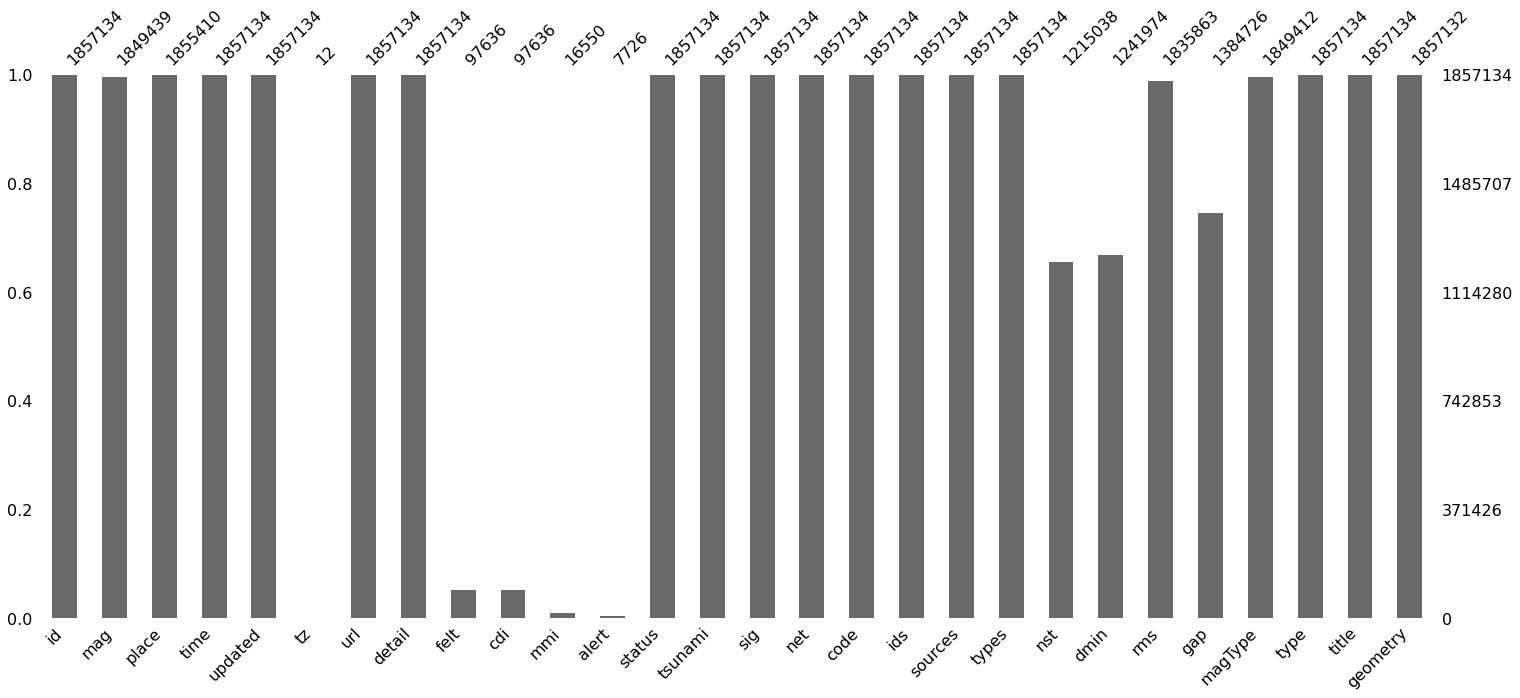

In [7]:
msno.bar(gdf)
plt.show()

we are going to focus on the features with more than 2% of missing values and give recomendation on action regarding imputation of nulls.

In [13]:
# there are too many nulls in tz. Let's see those rows
gdf[gdf['tz'].notnull()]

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
370037,ak0133i10sh6,2.50,"9 km ESE of Kokhanok, Alaska",1363553146986,1621902562323,-480.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",ak,ak,us,",",associate,geoserve,impact-text,nearby-cities,...",NaN,NaN,0.70,NaN,ml,earthquake,"M 2.5 - 9 km ESE of Kokhanok, Alaska",POINT Z (-154.621 59.4164 166.8)
391248,pr13138002,2.80,Puerto Rico region,1368852843100,1621901899469,-240.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",us,pr,us,",",associate,cap,geoserve,impact-text,nearby-cit...",4.0,1.262133,0.23,302.4,Md,earthquake,M 2.8 - Puerto Rico region,POINT Z (-66.2947 19.5382 13)
396316,nc71998286,2.84,Northern California,1369396749040,1659800906987,-420.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,1.0,...,",nc,nn,us,us,",",associate,dyfi,focal-mechanism,geoserve,impac...",29.0,0.182900,0.08,79.0,ml,earthquake,M 2.8 - Northern California,POINT Z (-121.0515 40.1753333 2.699)
516889,ak0146aw7ia4,2.60,"60 km NNW of Petersville, Alaska",1400355937726,1621900061273,-480.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",ak,ak,us,",",associate,geoserve,nearby-cities,origin,phase...",NaN,NaN,0.36,NaN,ml,earthquake,"M 2.6 - 60 km NNW of Petersville, Alaska",POINT Z (-151.0262 63.029 121.7)
529236,ak0147mly15l,2.60,"63 km ESE of King Salmon, Alaska",1402808359614,1621899924841,-480.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",ak,ak,us,",",associate,geoserve,nearby-cities,origin,phase...",NaN,NaN,0.82,NaN,ml,earthquake,"M 2.6 - 63 km ESE of King Salmon, Alaska",POINT Z (-155.6877 58.4316 149.2)
660792,ak0156o69i2o,2.70,"32 km E of Pedro Bay, Alaska",1432593632647,1621908806994,-480.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.0,1.0,...,",ak,us,ak,",",associate,dyfi,geoserve,nearby-cities,origin,...",NaN,NaN,0.65,NaN,ml,earthquake,"M 2.7 - 32 km E of Pedro Bay, Alaska",POINT Z (-153.5361 59.819 145.5)
713450,ak015dqtwwxl,2.70,"51 km N of Valdez, Alaska",1445892834811,1621909047533,-480.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",ak,ak,us,",",associate,geoserve,nearby-cities,origin,phase...",NaN,NaN,0.58,NaN,ml,earthquake,"M 2.7 - 51 km N of Valdez, Alaska",POINT Z (-146.2193 61.5933 35.1)
738818,ak016p23df6,2.60,"9 km N of Houston, Alaska",1452871029945,1621909216263,-540.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.0,1.0,...,",ak,ak,us,",",associate,dyfi,geoserve,nearby-cities,origin,...",NaN,NaN,0.59,NaN,ml,earthquake,"M 2.6 - 9 km N of Houston, Alaska",POINT Z (-149.8487 61.7163 39.2)
902711,us10008qmq,4.90,"128 km WSW of Adak, Alaska",1494280388150,1621910050936,-600.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",ak,ak,us,",",associate,geoserve,origin,phase-data,shakemap,",NaN,0.841000,0.78,127.0,mb,earthquake,"M 4.9 - 128 km WSW of Adak, Alaska",POINT Z (-178.4591 51.6318 10.24)
1027635,ak0183yk9220,2.80,"41 km SSE of Denali National Park, Alaska",1522182078809,1621910632604,-540.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",ak,ak,us,",",associate,geoserve,origin,phase-data,",NaN,NaN,0.77,NaN,ml,earthquake,"M 2.8 - 41 km SSE of Denali National Park, Alaska",POINT Z (-151.3082 63.2142 13.9)


The column 'tz' (timezone) is almost empty in all rows, but could be fill out taking in account the 'place' feature of each event.

In [20]:
# Let's check posibble values for alert. Even when this feature have many nulls, we could potencilly fill them out using the information of magnitude
gdf['alert'].unique()

array([nan, 'green', 'yellow', 'red', 'orange'], dtype=object)

***'mmi'*** is an important feature but we might not have enought information to fill out easily. 

*Pending to trial*
However we could try some type of imputation like KNN. This is still to be consider as the dataset is considerable big so might be an issue more.


something similar occurs with the column *** 'felt' ***. As these feature is updated by people, might be imposible to fill out, but coudl be imputed with a similar imputer as the mmi one. 

*** 'cdi' *** is related with 'felt' as both are information that people reported. We suggest to give the same imputer.

In [4]:
#Les check some info regarding the number of station which reported the times [weird numbers there]
gdf['nst'].describe()

count    1.215038e+06
mean     2.038371e+01
std      2.584463e+01
min      0.000000e+00
25%      8.000000e+00
50%      1.400000e+01
75%      2.400000e+01
max      9.340000e+02
Name: nst, dtype: float64

We recomend to imput the missing values on the ***'nst'*** with 1, since at least 1 station should have reported the time of the event.

In [6]:
#distance from the epicenter to the nearest station (in degrees). This column does not seem to be relevant so we might need to consider deleting.
gdf[gdf['dmin'].notnull()].sample(3)

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
1375242,nm60272517,1.71,"4 km NW of Marston, Missouri",1578036291740,1578080139240,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",nm,",",origin,phase-data,",27.0,0.01757,0.04,42.0,md,earthquake,"M 1.7 - 4 km NW of Marston, Missouri",POINT Z (-89.6563333 36.5443333 7.92)
1488600,ci37451493,1.18,"6km E of Westmorland, CA",1595713673780,1595907956265,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",ci,",",nearby-cities,origin,phase-data,scitech-link,",12.0,0.01815,0.28,64.0,ml,earthquake,"M 1.2 - 6km E of Westmorland, CA",POINT Z (-115.561 33.0428333 4.41)
1272390,ci38589767,1.11,"23km S of Trona, CA",1563380353120,1563380566794,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",ci,",",nearby-cities,origin,phase-data,scitech-link,",21.0,0.03709,0.20,91.0,ml,earthquake,"M 1.1 - 23km S of Trona, CA",POINT Z (-117.4258333 35.5641667 3.11)


Last column with many missing values is *** 'gap' *** This one give more accuracy when closer to 0. We saw that the values are quite small. We recomend to replace this with the mode to not alter too much the final information